In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [3]:
make_regression?

In [4]:
X,y = make_regression(n_samples= 5000, n_features=1, noise = 5)
X,y

(array([[ 1.10495178],
        [ 0.10620654],
        [-1.08243777],
        ...,
        [-0.66305622],
        [-1.52132073],
        [ 0.7366368 ]]),
 array([  71.16847603,    4.75181915,  -78.5102274 , ...,  -43.66352597,
        -107.34467432,   54.38903774]))

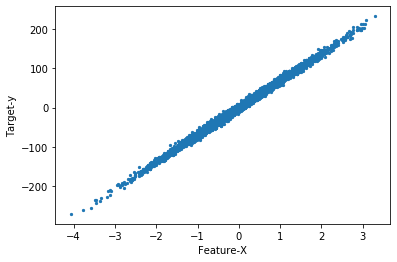

In [5]:
plt.xlabel('Feature-X')
plt.ylabel('Target-y')
plt.scatter(X, y, s=5);

In [6]:
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
linear_model.coef_

array([68.83746557])

In [8]:
linear_model.intercept_

0.09907113984252958

In [9]:
pred= linear_model.predict(X)

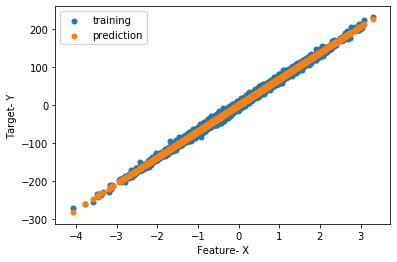

In [10]:
plt.scatter(X, y, s=25,label='training')
plt.scatter(X, pred, s=25, label='prediction')
plt.xlabel('Feature- X')
plt.ylabel('Target- Y')
plt.legend()
plt.show()
#s=25 shows and increases the marker size of the labels to make them bolder.

* Blue dots represent maps to actual target data while orange dots
represent the predicted values.

In [2]:
data= pd.read_csv('~\supervised-learning-w-python-master\supervised-learning-w-python-master\Chapter 2\House_data_LR.csv')
data.head()

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


In [3]:
#check for null values
data.isnull().any()

Unnamed: 0     False
sqft_living    False
price          False
dtype: bool

In [4]:
#drop the redundant feature "unnamed:0"
data.drop(columns= "Unnamed: 0", inplace= True)
# or data.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [5]:
data.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [8]:
#separating the independent and target variable
X = data.iloc[:, :1].values # will only pick up values for index 0.
y = data.iloc[:, -1].values

* When we use the iloc method, it picks the features or obervations, based on their indexes.
* X= all the rows and ,only the 1st or 0-index column, which is the independent variable, sqft_living... the areas of the houses
* Y = all the rows and the Price column, which is what we're seeking to predict.

In [9]:
data.describe()

,sqft_living,price
count,21613.000000,2.161300e+04
mean,2079.899736,5.400881e+05
std,918.440897,3.671272e+05
min,290.000000,7.500000e+04
25%,1427.000000,3.219500e+05
50%,1910.000000,4.500000e+05
75%,2550.000000,6.450000e+05
max,13540.000000,7.700000e+06


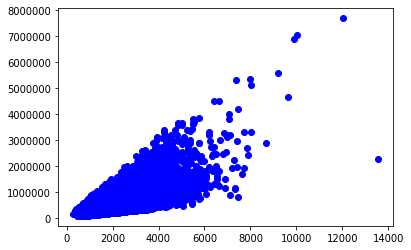

In [19]:
plt.plot(X, y, "bo")
#to  view the relationship between the two features.

In [14]:
plt.plot?

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 5)

In [20]:
#Train the model
simple_lr= LinearRegression()
simple_lr.fit(X_train, y_train)
#or LinearRegression().fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = simple_lr.predict?
#predict the values of X_test.

In [23]:
#use the model to predict on the test data
y_pred = simple_lr.predict(X_test)

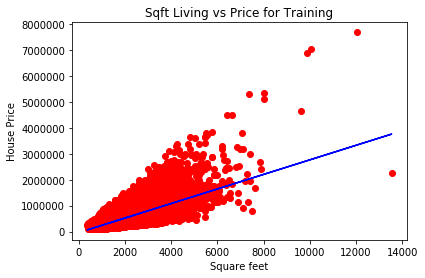

In [24]:
#test the model on the training data, predict on training data and visualize
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, simple_lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price for Training')
plt.xlabel('Square feet')
plt.ylabel('House Price')
plt.show()

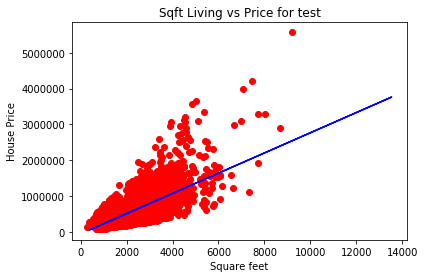

In [28]:
#test the model on the test data
plt.scatter(X_test, y_test, color='r')
plt.plot(X_train, simple_lr.predict(X_train), 'b')
plt.title('Sqft Living vs Price for test')
plt.xlabel('Square feet')
plt.ylabel('House Price')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
adj_r2 = 1- float(len(y)-1)/(len(y)-len(simple_lr.coef_)-1)*(1-r2)

rmse, r2, adj_r2, simple_lr.coef_, simple_lr.intercept_

(257125.13804007214,
 0.5020612063135523,
 0.5020381653254589,
 array([281.4054356]),
 -45441.308135309955)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21613 non-null  int64  
 1   price        21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [2]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy",
message="^internal gelsd")

In [3]:
house_mlr = pd.read_csv('~/supervised-learning-w-python-master/supervised-learning-w-python-master/Chapter 2/House_data.csv')

In [4]:
house_mlr.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_mlr.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house_data = pd.read_csv('~/supervised-learning-w-python-master/supervised-learning-w-python-master/Chapter 2/House_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

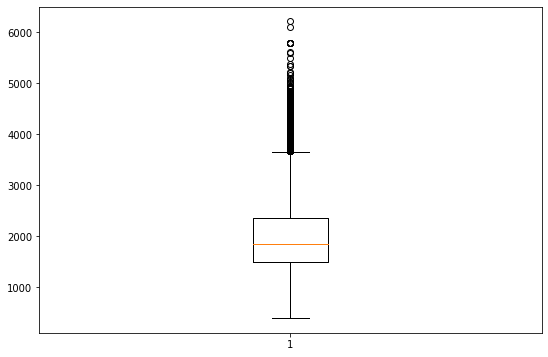

In [4]:
#visualize using a box plot
fig = plt.figure(1, figsize=(9,6))
ax= fig.add_subplot(111)
ax.boxplot(house_data['sqft_living15']);

In [5]:
plt.figure?
fig.add_subplot?
# fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5). 
#Note that all integers must be less than 10 for this form to work.

plt.subplots?
sns.heatmap?

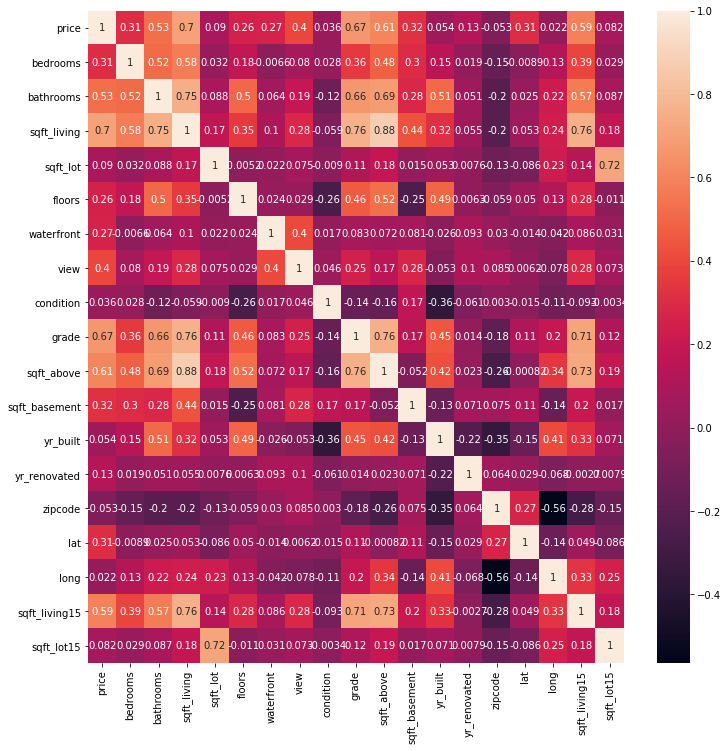

In [6]:
#developing a correlation matrix with the seaborn heatmap
house_data.drop(['id', 'date'], axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(12,12))
ax= sns.heatmap(house_data.corr(), annot= True)
# annot adds in the figures in the heatmap

* this heatmap highlights that all the features in this data influence price. Thus the perfect corr of 1.

In [7]:
house_data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [8]:
#create a new column for houses with basements
#the basement should be an integer where sqft_basement>0
house_data['basement']=(house_data['sqft_basement']>0).astype(int)

In [9]:
#create a column for the renovated houses
house_data['renovated']= (house_data['yr_renovated']>0).astype(int)

In [10]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0


In [11]:
to_drop = ['yr_renovated','sqft_basement']
#shorter than: house_data['yr_renovated'],house_data['sqft_basement']

In [12]:
house_data.drop(to_drop, 1, inplace=True)

In [13]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


In [14]:
pd.get_dummies?

In [15]:
categorical_variables = ['waterfront', 'view', 'condition','grade','floors','zipcode']

house_data= pd.get_dummies(house_data, columns= categorical_variables, drop_first= True)

In [16]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1180,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2170,1951,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X= house_data.iloc[:, 1:].values
y= house_data.iloc[:, 0].values
#.values puts the rows or observations in an array form

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#to predict the test set results
y_pred= mlr.predict(X_test)

In [22]:
#accuracy
print('Accuracy on Testing set: %.1f' %(mlr.score(X_test,y_test)*100))

Accuracy on Testing set: 83.6


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [27]:
adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2

(156453.303470312, 0.8363659007338857, 0.8355593716479466)